Linear_SVMはデータの数大きい時に有効である．

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

In [3]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1, 
                  train_size=0.8, 
                  test_size=0.2, 
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

In [5]:
import time

In [6]:
from sklearn.svm import SVC

clf = SVC(kernel='linear')

In [7]:
clf.set_params(C=1)

st = time.time()
clf.fit(X_train, y_train)
print(1000 * (time.time() - st), "[ms]")

clf.score(X_test, y_test)

4.271030426025391 [ms]


0.96491228070175439

In [11]:
clf.set_params(C=1e+20)

st = time.time()
clf.fit(X_train, y_train)
print(1000 * (time.time() - st), "[ms]")

clf.score(X_test, y_test)

255.82504272460938 [ms]


0.95614035087719296

In [13]:
from sklearn.model_selection import GridSearchCV

param = {'C': 10**np.arange(-15.0,21.0)}

gs = GridSearchCV(clf, param, verbose=1, cv=3)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:    2.1s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1e+20, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-15,   1.00000e-14,   1.00000e-13,   1.00000e-12,
         1.00000e-11,   1.00000e-10,   1.00000e-09,   1.00000e-08,
         1.00000e-07,   1.00000e-06,   1.00000e-05,   1.00000e-04,
         1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.0000...,   1.00000e+15,   1.00000e+16,
         1.00000e+17,   1.00000e+18,   1.00000e+19,   1.00000e+20])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [18]:
# gs.cv_results_['param_C'] はディクショナリなので，キーでアクセスできる．
gs.cv_results_['param_C'].data

array([1.0000000000000001e-15, 1e-14, 1e-13, 9.9999999999999998e-13,
       9.9999999999999994e-12, 1e-10, 1.0000000000000001e-09, 1e-08,
       9.9999999999999995e-08, 9.9999999999999995e-07,
       1.0000000000000001e-05, 0.0001, 0.001, 0.01, 0.10000000000000001,
       1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0, 1000000.0, 10000000.0,
       100000000.0, 1000000000.0, 10000000000.0, 100000000000.0,
       1000000000000.0, 10000000000000.0, 100000000000000.0,
       1000000000000000.0, 10000000000000000.0, 1e+17, 1e+18, 1e+19, 1e+20], dtype=object)

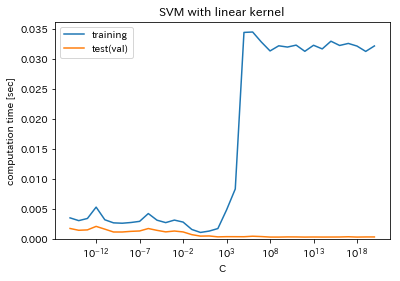

In [19]:
plt.plot(gs.cv_results_['param_C'].data, 
         gs.cv_results_['mean_fit_time'], 
         label="training")

plt.plot(gs.cv_results_['param_C'].data,
         gs.cv_results_['mean_score_time'], 
         label="test(val)")

plt.ylim(0,)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("computation time [sec]")
plt.legend(loc="best");
plt.title("SVM with linear kernel");

`LinearSVC`と
```python
SVC(kernel="linear")
```
は意味は同じだが，中身の数式や実装法が異なり別物．

 __LinearSVC__の方が早いので，線形サポートベクトルマシンを使う場合，こちらの方が大抵良い．

In [20]:
from sklearn.svm import LinearSVC

clf = LinearSVC()

In [21]:
clf.C = 1

st = time.time()
clf.fit(X_train, y_train)
print(1000 * (time.time() - st), "[ms]")

clf.score(X_test, y_test)

6.049156188964844 [ms]


0.96491228070175439

In [22]:
clf.C = 1e20

st = time.time()
clf.fit(X_train, y_train)
print(1000 * (time.time() - st), "[ms]")

clf.score(X_test, y_test)

11.94000244140625 [ms]


0.95614035087719296

In [23]:
from sklearn.model_selection import GridSearchCV

param = {'C': 10**np.arange(-15.0,21.0)}

gs2 = GridSearchCV(clf, param, verbose=1)
gs2.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:    0.5s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=LinearSVC(C=1e+20, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-15,   1.00000e-14,   1.00000e-13,   1.00000e-12,
         1.00000e-11,   1.00000e-10,   1.00000e-09,   1.00000e-08,
         1.00000e-07,   1.00000e-06,   1.00000e-05,   1.00000e-04,
         1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.0000...,   1.00000e+15,   1.00000e+16,
         1.00000e+17,   1.00000e+18,   1.00000e+19,   1.00000e+20])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

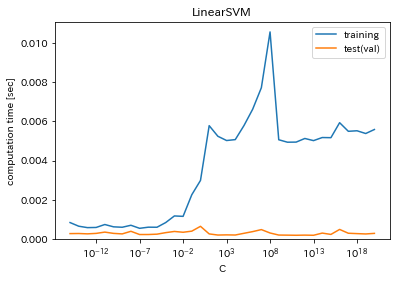

In [24]:
plt.plot(gs2.cv_results_['param_C'].data, 
         gs2.cv_results_['mean_fit_time'], 
         label="training")

plt.plot(gs2.cv_results_['param_C'].data,
         gs2.cv_results_['mean_score_time'], 
         label="test(val)")

plt.ylim(0,)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("computation time [sec]")
plt.legend(loc="best")
plt.title("LinearSVM");

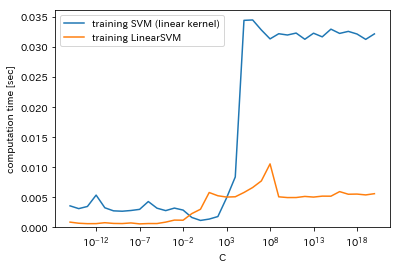

In [25]:
plt.plot(gs.cv_results_['param_C'].data, 
         gs.cv_results_['mean_fit_time'], 
         label="training SVM (linear kernel)")

plt.plot(gs2.cv_results_['param_C'].data, 
         gs2.cv_results_['mean_fit_time'], 
         label="training LinearSVM")

plt.ylim(0,)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("computation time [sec]")
plt.legend(loc="best");

In [26]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

estimators = [('scaler', MinMaxScaler()), 
              ('clf', LinearSVC())]

pipe = Pipeline(estimators)

In [28]:
from sklearn.model_selection import GridSearchCV

param = {'clf__C': 10**np.arange(-15.0,21.0)}

gs = GridSearchCV(estimator=pipe, param_grid=param, verbose=1, n_jobs=-1)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    0.3s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('clf', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'clf__C': array([  1.00000e-15,   1.00000e-14,   1.00000e-13,   1.00000e-12,
         1.00000e-11,   1.00000e-10,   1.00000e-09,   1.00000e-08,
         1.00000e-07,   1.00000e-06,   1.00000e-05,   1.00000e-04,
         1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1...,   1.00000e+15,   1.00000e+16,
         1.00000e+17,   1.00000e+18,   1.00000e+19,   1.00000e+20])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

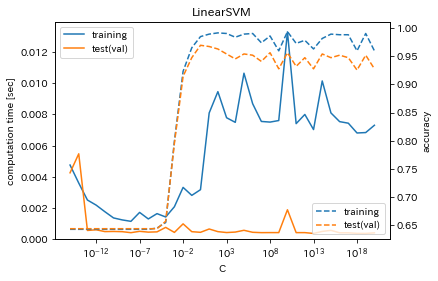

In [33]:
plt.plot(gs.cv_results_['param_clf__C'].data, 
         gs.cv_results_['mean_fit_time'], 
         label="training")

plt.plot(gs.cv_results_['param_clf__C'].data,
         gs.cv_results_['mean_score_time'], 
         label="test(val)")
plt.ylabel("computation time [sec]")
plt.ylim(0,)
plt.xscale("log")
plt.xlabel("C")
plt.legend(loc="upper left");

plt.twinx() #  x軸を共有して異なるスケールのものが一つの図にかける．

plt.plot(gs.cv_results_['param_clf__C'].data, 
         gs.cv_results_['mean_train_score'], 
         linestyle="--",
         label="training")

plt.plot(gs.cv_results_['param_clf__C'].data,
         gs.cv_results_['mean_test_score'], 
         linestyle="--",
         label="test(val)")
plt.ylabel("accuracy")
plt.legend(loc="lower right");

plt.title("LinearSVM")

plt.twinx()はx軸を共有して異なるスケールのものが一つの図にかけるようにする．

以下参照

[api example code: two_scales.py](https://matplotlib.org/examples/api/two_scales.html)

[matplotlib.axes.Axes.twinx](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.twinx.html)

In [34]:
from sklearn.preprocessing import MinMaxScaler

estimators = [('scaler', MinMaxScaler()), 
              ('clf', SVC(kernel='linear'))]

pipe = Pipeline(estimators)

In [36]:
from sklearn.model_selection import GridSearchCV

param = {'clf__C': 10**np.arange(-15.0,21.0)}

gs = GridSearchCV(estimator=pipe, param_grid=param, verbose=1, n_jobs=-1)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    1.4s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'clf__C': array([  1.00000e-15,   1.00000e-14,   1.00000e-13,   1.00000e-12,
         1.00000e-11,   1.00000e-10,   1.00000e-09,   1.00000e-08,
         1.00000e-07,   1.00000e-06,   1.00000e-05,   1.00000e-04,
         1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1...,   1.00000e+15,   1.00000e+16,
         1.00000e+17,   1.00000e+18,   1.00000e+19,   1.00000e+20])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

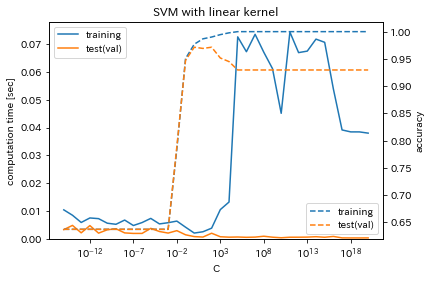

In [37]:
plt.plot(gs.cv_results_['param_clf__C'].data, 
         gs.cv_results_['mean_fit_time'], 
         label="training")

plt.plot(gs.cv_results_['param_clf__C'].data,
         gs.cv_results_['mean_score_time'], 
         label="test(val)")
plt.ylabel("computation time [sec]")
plt.ylim(0,)
plt.xscale("log")
plt.xlabel("C")
plt.legend(loc="upper left");

plt.twinx() # x軸を共有．

plt.plot(gs.cv_results_['param_clf__C'].data, 
         gs.cv_results_['mean_train_score'], 
         linestyle="--",
         label="training")

plt.plot(gs.cv_results_['param_clf__C'].data,
         gs.cv_results_['mean_test_score'], 
         linestyle="--",
         label="test(val)")
plt.ylabel("accuracy")
plt.legend(loc="lower right");

plt.title("SVM with linear kernel");

In [38]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

# MNISTの場合，60000が学習，10000がテスト，と決まっている
# http://yann.lecun.com/exdb/mnist/

X_train, X_test = mnist.data[:60000]/255., mnist.data[60000:]/255.
y_train, y_test = mnist.target[:60000], mnist.target[60000:]

In [39]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [40]:
clf = SVC(kernel='linear')

In [41]:
st = time.time()
clf.fit(X_train[::100], y_train[::100])
print(1000 * (time.time() - st), "[ms]")

243.88885498046875 [ms]


In [42]:
for thin in [100, 50, 10, 5, 4]: # > 1 min...
    st = time.time()
    clf.fit(X_train[::thin], y_train[::thin])
    et = time.time() - st
    score = clf.score(X_test[::thin], y_test[::thin])
    print("{0:.2f} sec, size {1}, accuracy {2}".format(et, 
                                                       y_train[::thin].size,
                                                       score))

0.24 sec, size 600, accuracy 0.89
0.65 sec, size 1200, accuracy 0.9
7.17 sec, size 6000, accuracy 0.905
21.68 sec, size 12000, accuracy 0.917
31.45 sec, size 15000, accuracy 0.9164


In [43]:
clf = LinearSVC() # dual

defaultで
```python
LinearSVC(dual=True)
```
となっている．

これは，solverがdualということを意味しており, dual は特徴数がとても多い時に早くなる．

In [44]:
for thin in [100, 50, 10, 5, 4]:
    st = time.time()
    clf.fit(X_train[::thin], y_train[::thin])
    et = time.time() - st
    score = clf.score(X_test[::thin], y_test[::thin])
    print("{0:.2f} sec, size {1}, accuracy {2}".format(et, 
                                                       y_train[::thin].size,
                                                       score))

0.14 sec, size 600, accuracy 0.91
0.45 sec, size 1200, accuracy 0.865
2.80 sec, size 6000, accuracy 0.866
8.15 sec, size 12000, accuracy 0.894
11.40 sec, size 15000, accuracy 0.8952


In [45]:
clf = LinearSVC(dual=False) # primal

```python
LinearSVC(dual=False)
```
だとsolverはdualではなくprimalを使用する．

primal は特徴数よりもデータ数がとても多い時に早くなる．

In [46]:
for thin in [100, 50, 10, 5, 4]:
    st = time.time()
    clf.fit(X_train[::thin], y_train[::thin])
    et = time.time() - st
    score = clf.score(X_test[::thin], y_test[::thin])
    print("{0:.2f} sec, size {1}, accuracy {2}".format(et, 
                                                       y_train[::thin].size,
                                                       score))

0.17 sec, size 600, accuracy 0.91
0.26 sec, size 1200, accuracy 0.87
1.28 sec, size 6000, accuracy 0.865
3.52 sec, size 12000, accuracy 0.894
5.01 sec, size 15000, accuracy 0.8956


np.array[::数字]　はその配列を数字ぶんだけ飛ばす．

[NumPy配列のスライシング機能の使い方](https://deepage.net/features/numpy-slicing.html)

In [55]:
a = np.arange(10)
a[::1]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [57]:
a[::2], a[::3]

(array([0, 2, 4, 6, 8]), array([0, 3, 6, 9]))

In [58]:
a[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

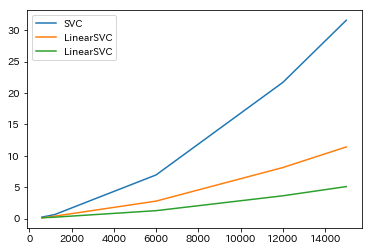

In [47]:
for clf in [SVC(kernel='linear'), 
            LinearSVC(), 
            LinearSVC(dual=False)]:
    times = []
    sizes = []
    for thin in [100, 50, 10, 5, 4]:
        st = time.time()
        clf.fit(X_train[::thin], y_train[::thin])
        times.append(time.time() - st)
        sizes.append(y_train[::thin].size)
    plt.plot(sizes, times, label=clf.__class__.__name__)

plt.legend(loc="best")
plt.show()

どのくらい時間がかかるのか，あたりをつけてから全てのデータで学習するべきである．

In [59]:
estimators = [('scaler', MinMaxScaler()), 
              ('clf', LinearSVC(dual=False))]

pipe = Pipeline(estimators)

param = {'clf__C': 10**np.arange(-5.0,10.0)}

gs = GridSearchCV(pipe, param, n_jobs=-1, verbose=2)
gs.fit(X_train, y_train) # about 30min...

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] clf__C=1e-05 ....................................................
[CV] clf__C=1e-05 ....................................................
[CV] clf__C=1e-05 ....................................................
[CV] clf__C=0.0001 ...................................................


KeyboardInterrupt: 

In [ ]:
estimators = [('scaler', MinMaxScaler()), 
              ('clf', LinearSVC(dual=True))]

pipe = Pipeline(estimators)

param = {'clf__C': 10**np.arange(-5.0,10.0)}

gs = GridSearchCV(pipe, param, n_jobs=-1, verbose=2)
gs.fit(X_train, y_train) # 1 hour ?

In [ ]:
estimators = [('scaler', MinMaxScaler()), 
              ('clf', SVC(kernel='linear'))]

pipe = Pipeline(estimators)

param = {'clf__C': 10**np.arange(-5.0,10.0)}

gs = GridSearchCV(pipe, param, n_jobs=-1, verbose=2)
gs.fit(X_train, y_train) # 2 hours ?